# Aircraft Risks Analysis Project

## Project Goal

In this project I aim to analyze critical risk factors within the aviation industry to better equip stakeholders in making data-driven decisions before venturing into the industry.

## Business Understanding

The company is intrested in expanding into the aviation industry. It's considering purchasing and operating airplanes for commercial and private enterprises and needs to be aware of the potential risks of aircrafts before venturing into this business. 

## Data Understanding

In this project, I'll make use of the [Aviation Accident Database & Synopses](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States, its territories and possessions, and international waters.
From the dataset, I'll be working with the AviationData csv, as it better suits our analysis of finding the lowest risk aircraft for the company. 

- The csv file contains over 30 columns, however, I filtered through them to use only the most relevant columns to our analysis.
- In this section, I'll inspect the structure of our dataset, including its general information, summary statistics, and dimensionality.

In [1]:
#import the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the data into a pandas dataframe
df = pd.read_csv('AviationData.csv', encoding='Latin1', low_memory = False)

#View the dataframe (including all columns)
pd.set_option('display.max_columns', None)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Get the general information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From df.info() we can see that our dataset has 31 columns and 88,889 rows. The majority of the datatypes is object with a few float data types. Alot of the columns contain a significant number of missing values, which we will deal with later.

In [4]:
#View the dimensionality of the dataset
df.shape

(88889, 31)

Above, df.shape shows us the dimensionality of our dataset, and as mentioned earlier, the dataset contains 88,889 rows and 31 columns.

In [5]:
#Summary stats of the numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Above, we get to see the statistical summary of all our numerical columns

## Data Preparation

In this section, I'll clean the data to ensure its suitable for our analysis. This will involve;
- Exploring the columns and selecting the ones most relevant to our analysis.
- Check and handle any missing values in the dataset.
- Ensure the columns have the appropriate dtypes.
- Prepare columns for future analysis.

In [6]:
#View the columns to select the ones relevant for our analysis
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#Modify the dataframe to only include the most relevant columns to our analysis
df = df.loc[:, ['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Aircraft.damage', 'Make', 'Model',
               'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 
               'Total.Uninjured', 'Weather.Condition']]

In [8]:
#Check for modified columns
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Aircraft.damage', 'Make', 'Model', 'Number.of.Engines',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [9]:
#Quick look of the dataframe after selecting columns to work with
df.head()

,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [10]:
#Check for missing values
df.isnull().sum()

Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Aircraft.damage            3194
Make                         63
Model                        92
Number.of.Engines          6084
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

<b> Considering that I'm working with a dataset with 88,889 entries, I decided to drop rows with missing values. Keeping in mind the sensitivity of this analysis- we're analyzing aviation risks, I found it problematic to impute the missing values with mean, median, or any other measure, due to the possible introduction of bias in the dataset. Also, I find that after dropping the rows with missing values, I'm still left with a large dataset, which could allow for accurate insights. 

In [11]:
#Drop rows with missing values
df.dropna(inplace=True)

In [12]:
#Check if missing values have been dropped
df.isnull().sum()

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [13]:
df.shape

(65413, 14)

65, 413 records, which is over 70% of the data, is still a good dataset to carry out our analysis with instead of risking introducing noise and bias in the data and end up with a misleading analysis

In [14]:
#Convert the date column to appropriate dtype
df['Event.Date'] = pd.to_datetime(df['Event.Date'])


#Convert the injuries columns from floats to integers as they represent the count of injuries
#Counts of injuries cannot be fractions; thus, an int dtype is more accurate.
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].astype(int)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].astype(int)
df['Total.Uninjured'] = df['Total.Uninjured'].astype(int)


#Convert the 'Number.of.Engines' columns from floats to integers since counts of engines cannot be fractions.
df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)

In [15]:
#Split the 'Event.Date' column into 'Year' column, 'Month' column, and 'Date' column for easier analysis later.
df['Accident.Year'] = df['Event.Date'].dt.year
df['Accident.Month'] = df['Event.Date'].dt.month
df['Accident.Date'] = df['Event.Date'].dt.day

In [16]:
#Combine the make and model columns to come with the identity of the plane for easier analysis later
df['Aircraft.Type'] = df['Make'].str.cat(df['Model'], sep= '-') 

In [17]:
#Ensure the values in this column are in the title format(first letter capitalized)
df['Aircraft.Type'] = df['Aircraft.Type'].str.title()

In [18]:
#Remove the Event.Date column as its now redundant with the introduction of 'Year', 'Month', 'Date' columns 
df.drop('Event.Date', axis=1, inplace=True)

In [19]:
#Set the 'Make' column values to title format
df['Make'] = df['Make'].str.title()

In [20]:
#Check the columns that we now have in the dataframe
df.columns

Index(['Investigation.Type', 'Location', 'Country', 'Aircraft.damage', 'Make',
       'Model', 'Number.of.Engines', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Accident.Year', 'Accident.Month', 'Accident.Date', 'Aircraft.Type'],
      dtype='object')

In [21]:
#Check data types
df.dtypes

Investigation.Type        object
Location                  object
Country                   object
Aircraft.damage           object
Make                      object
Model                     object
Number.of.Engines          int32
Purpose.of.flight         object
Total.Fatal.Injuries       int32
Total.Serious.Injuries     int32
Total.Minor.Injuries       int32
Total.Uninjured            int32
Weather.Condition         object
Accident.Year              int64
Accident.Month             int64
Accident.Date              int64
Aircraft.Type             object
dtype: object

In [22]:
#Check for our changes
df

,Investigation.Type,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Accident.Year,Accident.Month,Accident.Date,Aircraft.Type
0,Accident,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1,Personal,2,0,0,0,UNK,1948,10,24,Stinson-108-3
1,Accident,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1,Personal,4,0,0,0,UNK,1962,7,19,Piper-Pa24-180
3,Accident,"EUREKA, CA",United States,Destroyed,Rockwell,112,1,Personal,2,0,0,0,IMC,1977,6,19,Rockwell-112
6,Accident,"COTTON, MN",United States,Destroyed,Cessna,180,1,Personal,4,0,0,0,IMC,1981,8,1,Cessna-180
7,Accident,"PULLMAN, WA",United States,Substantial,Cessna,140,1,Personal,0,0,0,2,VMC,1982,1,1,Cessna-140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,Accident,"Casa Grande, AZ",United States,Substantial,Arado-Flugzeugwerke Gmbh,FW190 A-5,1,Personal,0,0,0,1,VMC,2022,12,9,Arado-Flugzeugwerke Gmbh-Fw190 A-5
88865,Accident,"Knoxville, TN",United States,Substantial,Cessna,172,1,Instructional,0,0,0,1,VMC,2022,12,12,Cessna-172
88873,Accident,"San Juan, PR",United States,Substantial,Cirrus Design Corp,SR22,1,Personal,0,0,0,1,VMC,2022,12,14,Cirrus Design Corp-Sr22
88877,Accident,"Brooksville, FL",United States,Substantial,Cessna,R172K,1,Personal,0,1,0,0,VMC,2022,12,16,Cessna-R172K


In [23]:
#Confirm the new dimensionality of the dataframe
df.shape

(65413, 17)

## Data Analysis

In [24]:
#Let's check out the top 10 most common aircrafts involved in aviation accidents
top_10_aircrafts_accidents = df['Make'].value_counts().head(10)
top_10_aircrafts_accidents

Cessna      21666
Piper       12000
Beech        4117
Bell         1837
Mooney       1055
Grumman      1029
Bellanca      888
Hughes        709
Boeing        695
Robinson      628
Name: Make, dtype: int64

- From the above output, we can see that the Cessna aircrafts makes are involved in the most number of reported accidents and incidents.
- I'll delve deeper into this under the 'Data Visualization' section

In [25]:
#Let's discover the top five purposes of flying; commercial or private
df['Purpose.of.flight'].value_counts().head(10)

Personal              39593
Instructional          8447
Unknown                5027
Aerial Application     3976
Business               3329
Positioning            1143
Other Work Use          877
Ferry                   687
Aerial Observation      599
Public Aircraft         488
Name: Purpose.of.flight, dtype: int64

- From the above analysis, those flying for 'Personal' purposes were involved in the most number of reported cases. This might mean that private aircrafts are ones involved in most accidents and incidents. 
- I'll also discuss this further during visualization

In [26]:
#Let's check the investigation types
df['Investigation.Type'].value_counts()

Accident    64309
Incident     1104
Name: Investigation.Type, dtype: int64

- As seen above 64,309 reported cases were accidents while 1,104 reported cases were incidents

In [27]:
#Let's check out the level of aircraft damage in the accidents
damages = df['Aircraft.damage'].value_counts()
damages

Substantial    49659
Destroyed      14169
Minor           1546
Unknown           39
Name: Aircraft.damage, dtype: int64

- Majority of the reported cases ended up with substantial damages.

## Data Visualization 

This section, intends to extract insights from the data and answer the following key questions with visualizations;

<b>

- Which aircraft are the lowest risk for the company to start this new business endevor?
- What is the trend of aviation accidents over time?
- Which aircrafts have the highest number of recorded accidents/incidents?
- How do weather conditions affect the number of accidents and incidents?
- Which purpose of flight (e.g., commercial, private) has the most incidents?
- How bad are the damages in aircrafts after accidents/incidents?

<b>KEY QUESTION 1 : Which aircraft are the lowest risk for the company to start this new business endevor?
    
  - In this question I'll analyze and visualize the aircrafts make and model ('Aircraft.Type') with the least reported accidents and incidents.
  - This analysis will show us some of the lowest risk aircrafts in the industry.
  - Insights from this visualizations can help stakeholders decide on what aircrafts to consider in this venture.

In [28]:
#I defined 'lowest risk aircraft' as aircrafts that experienced the least level of damage i.e 'Minor' damages
# Group the dataset by Aircraft.Type (make and model) and 'Aircraft.damage', and count occurrences of each damage level
damage_by_aircraft_type = df.groupby(['Aircraft.Type', 'Aircraft.damage']).size().unstack().fillna(0)

#Sort the data by the least damage to find the lowest risk aircrafts
less_damage_aircrafts = damage_by_aircraft_type['Minor'].sort_values(ascending=False)

#Top 10 aircraft types that reported the least damages
less_damage_aircrafts.head(10)

Aircraft.Type
Cessna-152                    25.0
Piper-Pa-31-350               19.0
Cessna-402C                   17.0
Mcdonnell Douglas-Dc-10-10    14.0
Boeing-727-200                13.0
Cessna-207                    11.0
Boeing-727-223                11.0
Piper-Pa-34-200T              11.0
Cessna-402B                   11.0
Boeing-727-232                10.0
Name: Minor, dtype: float64

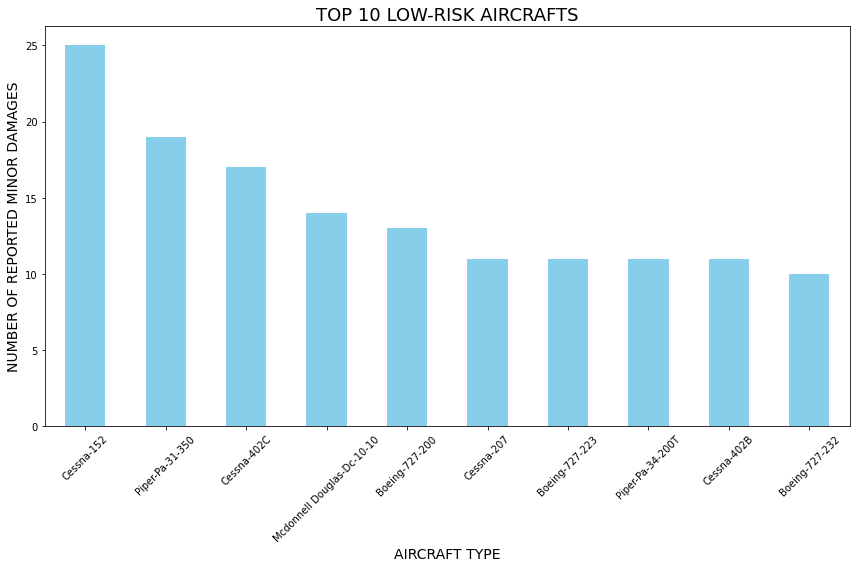

<Figure size 432x288 with 0 Axes>

In [29]:
#Let's create a bar plot to visualize this
#Create the bar chart
less_damage_aircrafts.head(10).plot(kind='bar', figsize=(12,8), color='skyblue')

#Set labels and title
plt.title('TOP 10 LOW-RISK AIRCRAFTS', fontsize= 18)
plt.xlabel('AIRCRAFT TYPE', fontsize= 14)
plt.ylabel('NUMBER OF REPORTED MINOR DAMAGES', fontsize= 14)
plt.xticks(rotation= 45)
plt.tight_layout()

#Display the plot
plt.show()

#Save the plot as image
plt.savefig('low_risk-_aircrafts.png')

- From this analysis, stakeholders can identify which types of aircraft sustain less damage in all reported incidents. This insight helps in selecting more durable aircraft models.

 <b>KEY QUESTION 2: What is the trend of aviation accidents over time?
    
   - In this question I want to see what are the trends of accidents over the years in the aviation industry. 
   - Should the stakeholders be considering this business venture in the first place or is it too risky?
   - I will be using a line graph for this analysis as its best for showing trends

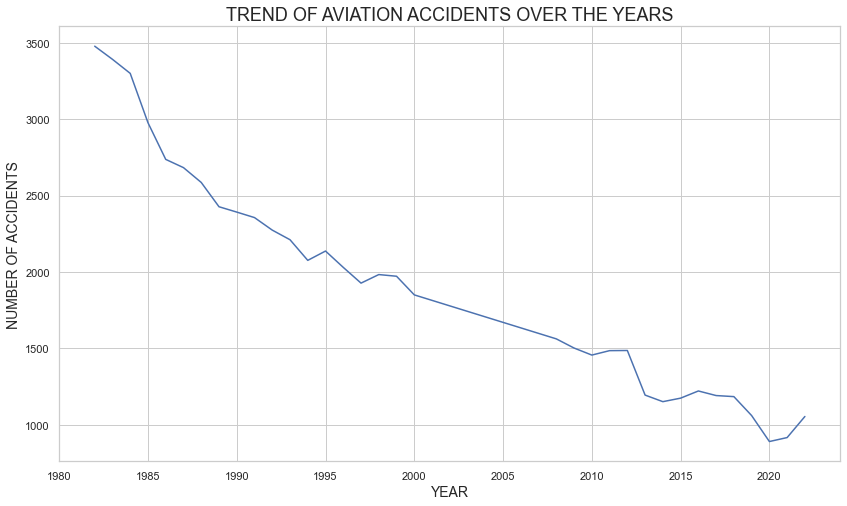

<Figure size 432x288 with 0 Axes>

In [30]:
#Specify the data that'll be used for plotting the linegraph
#I used .size() to count each recorded incident per year
accident_data = df.groupby('Accident.Year').size()

#I noticed that some years have significantly less recorded incidents that when included in the visualization distorted it.  
#I eliminated the years with very few recorded incidents from the graph to maintain an accurate visualization of the incidents.
data = accident_data[accident_data >= 100]

#I used Seaborn for a better-looking plot
sns.set(style='whitegrid')

#Create the figure
plt.figure(figsize=(14,8))

#Create the linegraph
sns.lineplot(data= data, markers=True)

#Set the labels and title
plt.title('TREND OF AVIATION ACCIDENTS OVER THE YEARS', fontsize = 18)
plt.xlabel('YEAR', fontsize = 14)
plt.ylabel('NUMBER OF ACCIDENTS', fontsize = 14 )

#Display the plot
plt.show()


#Save the plot as image
plt.savefig('trend_of_accidents.png')

- As evident in the linegraph above, there has been a steady decrease in aviation accidents over the years. 
- We can attribute this to better technology, aviation knowlegde, or engineering over the years.
- This is the first greenlight for our stakeholders that shows the aviation industry might be a viable business venture, as the reported accident incidents have significantly reduced overtime. 
- Stakeholders can leverage this trend in marketing and when looking for investors.

<b>KEY QUESTION 3; Which aircrafts have the highest number of recorded accidents?

   - In this question, I'll be investigating what aircrafts (manufacturer) have been involved in most aviation accidents.
   - If stakeholders decide to move ahead with this venture, they need to be aware of aircraft manufacturers/models to crutinize further.
   - For this analysis, I'll use a bar chart to visualize the top ten manufacturers to investigate further when considering where to buy an aircraft. There's a caveat for this analysis that we'll address after the visualization.

- I already specified the data that'll be used for plotting this barchart. 
- I filtered this data out earlier when looking at the top 10 most common aircrafts involved in aviation accidents in the data analysis section

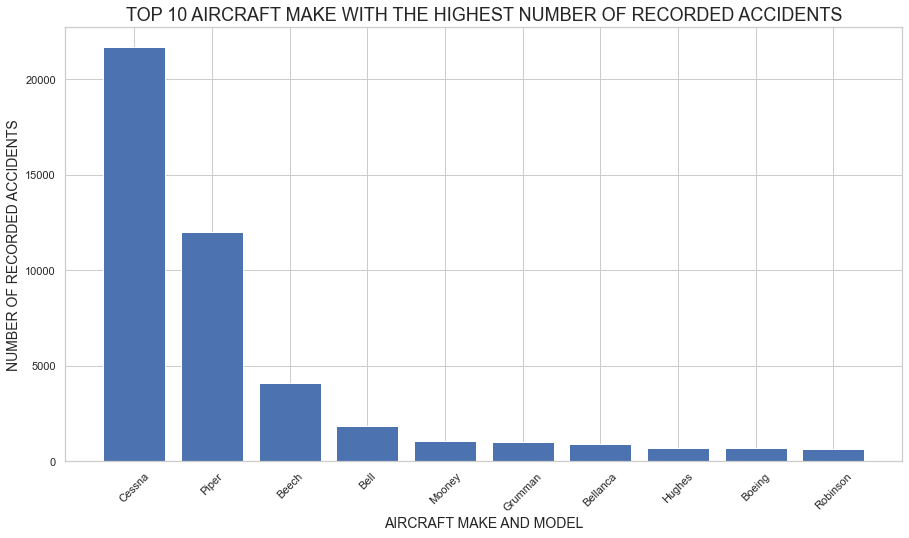

<Figure size 432x288 with 0 Axes>

In [31]:
#Create the figure
plt.figure(figsize=(15,8))

#Create the linegraph
plt.bar(x = top_10_aircrafts_accidents.index, height =top_10_aircrafts_accidents.values)

#Set the labels and title
plt.title('TOP 10 AIRCRAFT MAKE WITH THE HIGHEST NUMBER OF RECORDED ACCIDENTS', fontsize = 18)
plt.xlabel('AIRCRAFT MAKE AND MODEL', fontsize= 14)
plt.ylabel('NUMBER OF RECORDED ACCIDENTS', fontsize= 14 )
plt.xticks(rotation = 45)

# Display the plot
plt.show()

#Save the plot as image
plt.savefig('high_risk_aircrafts.png')

- The Cessna and Piper aircraft make have the highest number of reported cases. This may suggests two things; the aircrafts are generally unsafe as they are involved in most accidents/incidents or (the caveat-->) they are simply involved in more frequent flights, hence more records. 

- Regardless, stakeholders should keep in mind the consequences of operating these models, and should also consider where they're commonly used and whether they intend to explore those sectors. 

- Therefore, the high accident numbers for these makes may also reflect their popularity and frequent usage rather than an inherent safety flaw. So I'd suggest stakeholders investigate whether the accident rates are proportional to the number of flights.

<b> KEY QUESTION 4: How do weather conditions affect the number of accidents and incidents?
    
   - In this question I'll investigate the different weather conditions and their corresponding reported accidents.
   - With the helps of a bar plot, we'll visualize how many accidents and incidents were reported for each weather condition.
   - This information will help the stakeholders be aware of the risks of operating in certain weather conditions.

In [32]:
weather = df['Weather.Condition'].value_counts()
weather

VMC    60225
IMC     4517
UNK      579
Unk       92
Name: Weather.Condition, dtype: int64

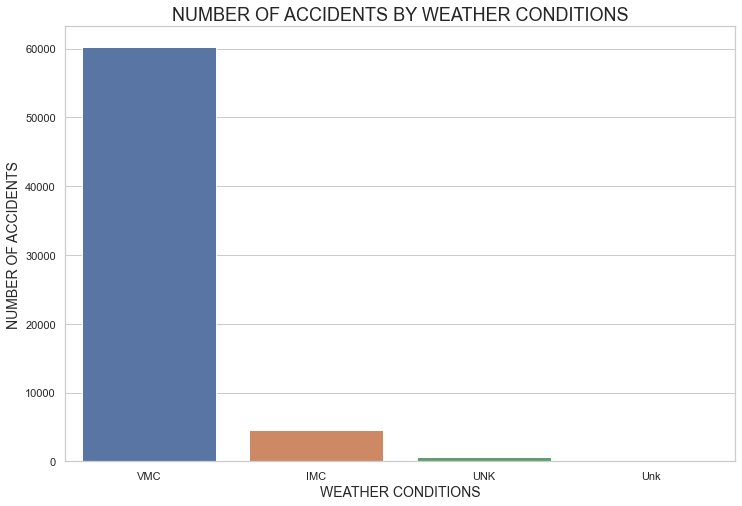

<Figure size 432x288 with 0 Axes>

In [33]:
#Create the figure
plt.figure(figsize=(12, 8))

#Create the bar chart
sns.barplot(x= weather.index, y= weather.values)

#Set the title and labels
plt.title('NUMBER OF ACCIDENTS BY WEATHER CONDITIONS', fontsize = 18)
plt.xlabel('WEATHER CONDITIONS', fontsize= 14)
plt.ylabel('NUMBER OF ACCIDENTS', fontsize= 14)
plt.show()

#Save the plot as image
plt.savefig('accidents_by_weather.png')

- The majority of reported cases occurred under VMC weather conditions. For stakeholders, this implies that they'll need to direct resources to reinforce operational safety measures even in favorable weather conditions.

- These insights can also guide stakeholders to invest in technologies that improve safety in poor weather conditions in the company's aircraft

<b>KEY QUESTION 5; Which purpose of flight (e.g., commercial, private) has the most incidents?

   - This question aims to answer how the accidents and incidents are distributed across different purposes of flight, eg, commercial, private, etc)
   - With this analysis the stakeholders will be able to see which direction to follow when it comes to their venture. Should they venture into private aircrafts or commercial. 

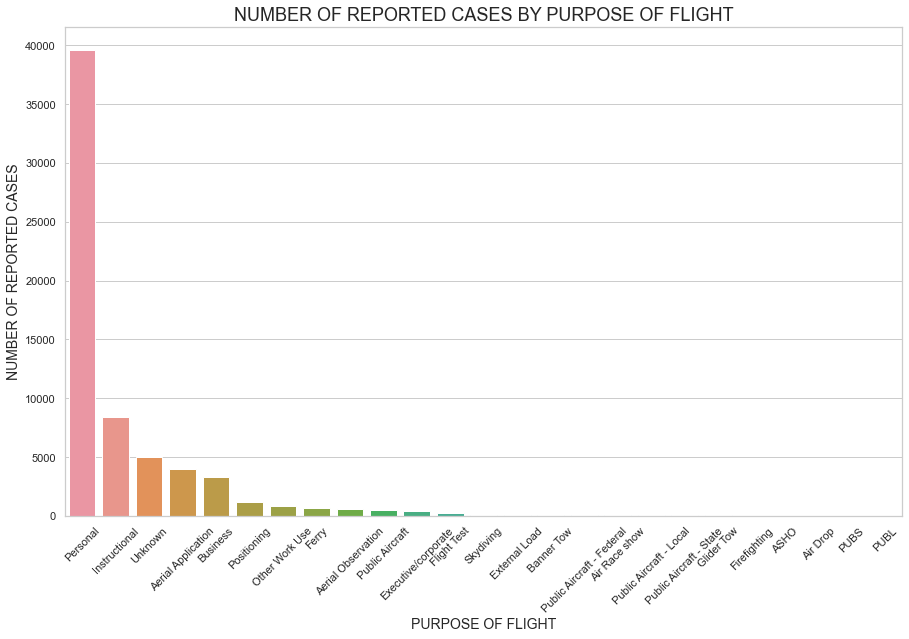

<Figure size 432x288 with 0 Axes>

In [34]:
#Create a figure
plt.figure(figsize=(15, 9))

#Create the countplot
sns.countplot(data=df, x='Purpose.of.flight', order=df['Purpose.of.flight'].value_counts().index)

#Set the labels and title
plt.title('NUMBER OF REPORTED CASES BY PURPOSE OF FLIGHT', fontsize = 18)
plt.xlabel('PURPOSE OF FLIGHT', fontsize= 14)
plt.ylabel('NUMBER OF REPORTED CASES', fontsize= 14)
plt.xticks(rotation=45)
plt.show()

#Save the plot as image
plt.savefig('accidents_by_flightpurpose.png')

- This countplot shows a significantly higher number of incidents for a Personal flying purposes. This information may suggest to stakeholders that aircrafts mainly used for personal purposes have a higher risk, if they should choose to deal with these types. 
- Also, particular purposes of flight like ferry, aerial observation, and public show lower incident rate, so stakeholders might consider these segments more favorable for investment.
- Additionally, this analysis can help stakeholders get a rough idea of the regulations in certain categories. For instance, personal flying may be heavily regulated due to the higher accident cases. They should, therefore, prepare for these potential regulations which could affect operations and costs.

<b>KEY QUESTION 6: How bad are the damages in aircrafts after accidents/incidents?
    
   - In this question I want to visualize the aircraft damage column and see how the damage was distributed across the reported cases.
   - This analysis will provide insight to stakeholders into the severity of aircraft damage in past incidents. 

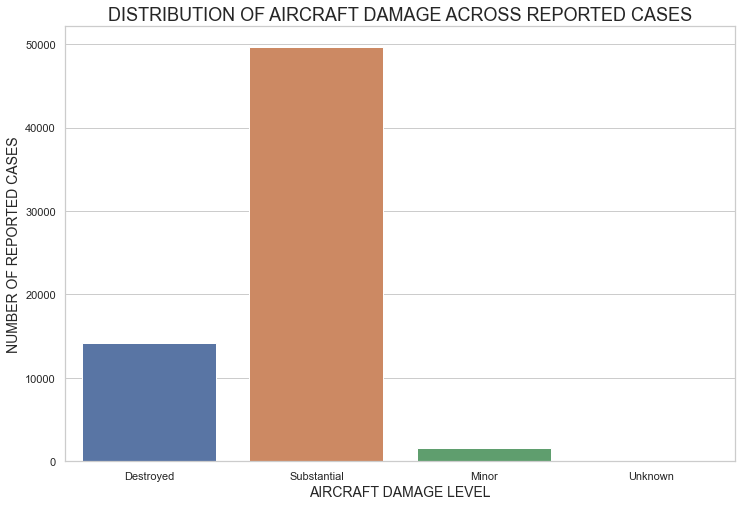

<Figure size 432x288 with 0 Axes>

In [35]:
#Create a figure
plt.figure(figsize=(12, 8))


#Create the bar plot
sns.countplot(data=df, x='Aircraft.damage')

#Add title and labels
plt.title('DISTRIBUTION OF AIRCRAFT DAMAGE ACROSS REPORTED CASES', fontsize=18)
plt.xlabel('AIRCRAFT DAMAGE LEVEL', fontsize=14)
plt.ylabel('NUMBER OF REPORTED CASES', fontsize=14)

#Display the plot
plt.show()

#Save the plot as image
plt.savefig('damage_level.png')

- This visualization provides insights to stakeholders of how risky the aviation industry is and how costly these incidents may be in terms of repairs and replacement, insurance, and potential loss of life.
- Stakeholders also need to think of things like safety protocols needed to be set in place for operating aircrafts

## Conclusion

This analysis reveals the risk factors within the aviation industry. The most accident-prone aircraft models, the trend of aviation accidents, the role of weather conditions, and the damage level experienced  have all been explored in detail. The findings and recommendations are included under the recommendations section below

## Recommendations

<b>

1. Consider purchasing and operating low-risk aircraft models, as they have consistently lower accident rates. This approach will not only minimize operational risks but will also enhance the company’s reputation for safety.(REFER TO VISUALIZATION IN KEY QUESTION 1)

2. Take advantage of the downward trend in aviation accidents. With the steady decline in aviation accidents over the years, you can capitalize this during marketing to attract investors as well as customers.(REFER TO VISUALIZATION IN KEY QUESTION 2)

3. Invest in aircrafts suitable for flight purposes with a low risk profile. Cautiously evaluate whether to enter a specific segment before purchasing aircrafts suitable for that sector. For instance, sectors like ferry, aerial observation, and public flying record lower incident rates and may be a safer and more favorable investment opportunity.(REFER TO VISUALIZATION IN KEY QUESTION 5)

## Next Steps

To conduct a deeper analysis on the root causes behind accidents and incidents in certain aircraft make and models. Explore further to determine which manufacturers produce the most incident-prone models, to aid in informed procurement decisions.

To conduct further analysis to understand frequency vs. risk, especially for models like Cessna which appear in both low-risk aircrafts and in aircrafts with the most recorderd cases. Find out and prove if this paradox is indeed simply because these models are flown more frequently compared to other models and not due to inherent safety flaws.